In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn

# IBM hr Data Analysit

## load in data

In [2]:
data = pd.read_csv("C:/Users/USER/Desktop/HR.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Check out missing values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

## LOL~ there is no missing value in this dataset

## quick simple Statistical Analysis
### First , divide dataset into two group , Category variables and Numerical variables
#### 有些類別變數EX : 學歷 雖然是類別變數但是他的大小是有意義的所以這邊就先把他放在num裡面 

In [4]:
cat = ["Attrition","BusinessTravel","Department","EducationField","JobRole","MaritalStatus","Over18","OverTime",
       "WorkLifeBalance","StockOptionLevel","RelationshipSatisfaction","PerformanceRating","JobSatisfaction",
       "JobLevel","JobInvolvement" , "EnvironmentSatisfaction" ,"Education" ,"Gender"]
num = list(set(list(data.columns))-set(cat))

## Category variables

In [5]:
data[cat].head()

,Attrition,BusinessTravel,Department,EducationField,JobRole,MaritalStatus,Over18,OverTime,WorkLifeBalance,StockOptionLevel,RelationshipSatisfaction,PerformanceRating,JobSatisfaction,JobLevel,JobInvolvement,EnvironmentSatisfaction,Education,Gender
0,Yes,Travel_Rarely,Sales,Life Sciences,Sales Executive,Single,Y,Yes,1,0,1,3,4,2,3,2,2,Female
1,No,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married,Y,No,3,1,4,4,2,2,2,3,1,Male
2,Yes,Travel_Rarely,Research & Development,Other,Laboratory Technician,Single,Y,Yes,3,0,2,3,3,1,2,4,2,Male
3,No,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married,Y,Yes,3,0,3,3,3,1,3,4,4,Female
4,No,Travel_Rarely,Research & Development,Medical,Laboratory Technician,Married,Y,No,3,1,4,3,2,1,3,1,1,Male


## 經過觀察 , 所有Over18觀察值都是Y,他無法給我們任何有用的訊息,將這個feature丟掉
## 將Attrition中 Yes改為1 , no改為0
## 將Overtime中  Yes改為1 , no改為0
## 將Gender  中   Male改為1 , Female 改為0

In [6]:
data = data.drop("Over18",axis=1)
data["Attrition"] = data["Attrition"].replace(["Yes","No"],[1,0])
data["OverTime"] = data["OverTime"].replace(["Yes","No"],[1,0])
data["Gender"] = data["Gender"].replace(["Female","Male"],[1,0])

 ## Attrition

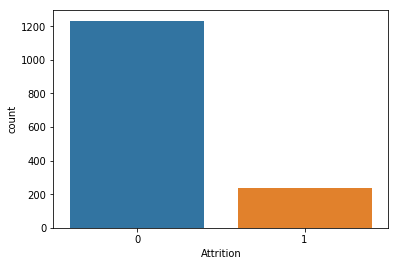

In [7]:
sn.countplot(data["Attrition"])

In [8]:
zero = data["Attrition"].value_counts()[0]
one = data["Attrition"].value_counts()[1]
one/(one+zero)

0.16122448979591836

## 觀察 :
* 資料為不平衡資料集
* 僅有0.161比例的資料是attrition(離職)的

## BusinessTravel

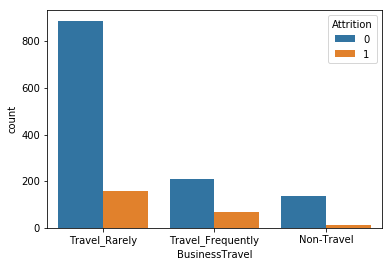

In [9]:
sn.countplot(data["BusinessTravel"],hue= data["Attrition"])

## 定義一個函數來觀察各類別變數與attrition的關係

In [10]:
#定義一個函數來做資料觀察
def group_per (data,col1,col2) :
    df = data.groupby(by = [col1,col2]).size().unstack(1)
    df["Sum"] = df[df.columns[0]] + df[df.columns[1]]
    df["Per"] = df[df.columns[1]]/(df[df.columns[0]]+df[df.columns[1]]) 
    df = df.sort_values(by="Per")
    return df

In [11]:
group_per(data,"BusinessTravel","Attrition")

Attrition,0,1,Sum,Per
BusinessTravel,,,,
Non-Travel,138,12,150,0.080000
Travel_Rarely,887,156,1043,0.149569
Travel_Frequently,208,69,277,0.249097


## 好像越常參加BusinessTravel的員工越容易離職
## BusinessTravel中的類別是有順序意義的將它取代為 0,1,2

In [12]:
data["BusinessTravel"] = data["BusinessTravel"].replace(["Non-Travel","Travel_Rarely","Travel_Frequently"],[0,1,2])

# Department

Attrition,0,1,Sum,Per
Department,,,,
Research & Development,828,133,961,0.138398
Human Resources,51,12,63,0.190476
Sales,354,92,446,0.206278


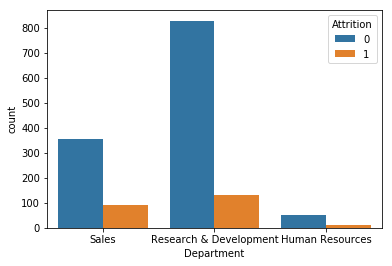

In [13]:
sn.countplot(data["Department"],hue= data["Attrition"])
group_per(data,"Department","Attrition")

## 觀察 :
* Sales 和 Hr 離職率稍微高一點


## 在Department中的變數只是純類別 , 他是沒有順序意義的因此將他改為Dummy Variable
## 並將本來的Department刪除

In [14]:
# 純類別變數department 轉成dummy variable
department = pd.get_dummies(data["Department"],drop_first=True)
data = data.drop("Department",axis=1)
data = pd.concat([data,department],axis=1)

# EducationField

Attrition,0,1,Sum,Per
EducationField,,,,
Other,71,11,82,0.134146
Medical,401,63,464,0.135776
Life Sciences,517,89,606,0.146865
Marketing,124,35,159,0.220126
Technical Degree,100,32,132,0.242424
Human Resources,20,7,27,0.259259


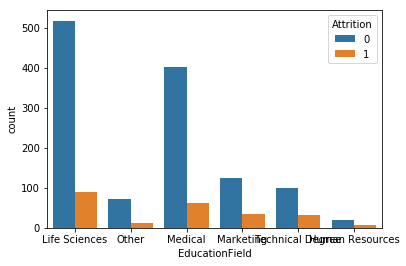

In [15]:
sn.countplot(data["EducationField"],hue=data["Attrition"])
group_per(data,"EducationField","Attrition")

## 觀察 :
* hr , Technical,marketing 都有蠻高的離職率

## 同樣轉為dummy variable

In [16]:
educationfield = pd.get_dummies(data["EducationField"],drop_first=True)
data = data.drop("EducationField",axis=1)
data = pd.concat([data,educationfield],axis=1)

# JobRole

Attrition,0,1,Sum,Per
JobRole,,,,
Research Director,78,2,80,0.025000
Manager,97,5,102,0.049020
Healthcare Representative,122,9,131,0.068702
Manufacturing Director,135,10,145,0.068966
Research Scientist,245,47,292,0.160959
Sales Executive,269,57,326,0.174847
Human Resources,40,12,52,0.230769
Laboratory Technician,197,62,259,0.239382
Sales Representative,50,33,83,0.397590


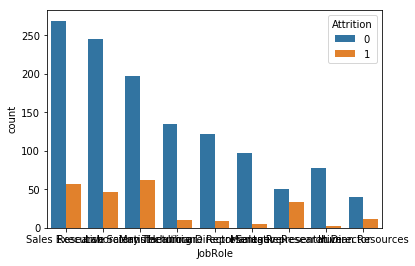

In [17]:
sn.countplot(data["JobRole"],hue=data["Attrition"])
group_per(data,"JobRole","Attrition")

In [18]:
# dummy
jobrole = pd.get_dummies(data["JobRole"],drop_first=True)
data = data.drop("JobRole",axis=1)
data = pd.concat([data,jobrole],axis=1)

## 觀察 :
* Human Resources
* Laboratory Technician
* Sales Representative
## 離職率較高

# MaritalStatus

Attrition,0,1,Sum,Per
MaritalStatus,,,,
Divorced,294,33,327,0.100917
Married,589,84,673,0.124814
Single,350,120,470,0.255319


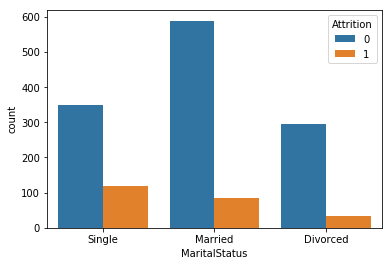

In [19]:
sn.countplot(data["MaritalStatus"],hue = data["Attrition"])
group_per(data,"MaritalStatus","Attrition")


In [20]:
maritalstatus = pd.get_dummies(data["MaritalStatus"],drop_first=True)
data = data.drop("MaritalStatus",axis=1)
data = pd.concat([data,maritalstatus],axis=1)

# 觀察
* 單身的人離職率較高,也許單身的人較無家庭經濟壓力或是單身的人大多是年輕人流動率較高

# OverTime

Attrition,0,1,Sum,Per
OverTime,,,,
0,944,110,1054,0.104364
1,289,127,416,0.305288


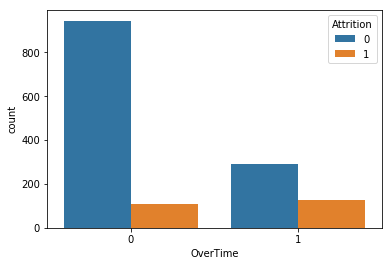

In [21]:
sn.countplot(data["OverTime"],hue=data["Attrition"])
group_per(data,"OverTime","Attrition")

## 觀察 :
* 超時加班看起來會顯著增加離職的意願,這應該會是個重要的feature

# Numerical variables

In [22]:
data[num].head()

,PercentSalaryHike,YearsSinceLastPromotion,EmployeeCount,Age,TrainingTimesLastYear,StandardHours,MonthlyIncome,YearsAtCompany,NumCompaniesWorked,DailyRate,EmployeeNumber,YearsWithCurrManager,HourlyRate,TotalWorkingYears,MonthlyRate,DistanceFromHome,YearsInCurrentRole
0,11,0,1,41,0,80,5993,6,8,1102,1,5,94,8,19479,1,4
1,23,1,1,49,3,80,5130,10,1,279,2,7,61,10,24907,8,7
2,15,0,1,37,3,80,2090,0,6,1373,4,0,92,7,2396,2,0
3,11,3,1,33,3,80,2909,8,1,1392,5,0,56,8,23159,3,7
4,12,2,1,27,3,80,3468,2,9,591,7,2,40,6,16632,2,2


## 快速看一下基本統計量

In [23]:
data[num].describe()

,PercentSalaryHike,YearsSinceLastPromotion,EmployeeCount,Age,TrainingTimesLastYear,StandardHours,MonthlyIncome,YearsAtCompany,NumCompaniesWorked,DailyRate,EmployeeNumber,YearsWithCurrManager,HourlyRate,TotalWorkingYears,MonthlyRate,DistanceFromHome,YearsInCurrentRole
count,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,15.209524,2.187755,1.0,36.923810,2.799320,80.0,6502.931293,7.008163,2.693197,802.485714,1024.865306,4.123129,65.891156,11.279592,14313.103401,9.192517,4.229252
std,3.659938,3.222430,0.0,9.135373,1.289271,0.0,4707.956783,6.126525,2.498009,403.509100,602.024335,3.568136,20.329428,7.780782,7117.786044,8.106864,3.623137
min,11.000000,0.000000,1.0,18.000000,0.000000,80.0,1009.000000,0.000000,0.000000,102.000000,1.000000,0.000000,30.000000,0.000000,2094.000000,1.000000,0.000000
25%,12.000000,0.000000,1.0,30.000000,2.000000,80.0,2911.000000,3.000000,1.000000,465.000000,491.250000,2.000000,48.000000,6.000000,8047.000000,2.000000,2.000000
50%,14.000000,1.000000,1.0,36.000000,3.000000,80.0,4919.000000,5.000000,2.000000,802.000000,1020.500000,3.000000,66.000000,10.000000,14235.500000,7.000000,3.000000
75%,18.000000,3.000000,1.0,43.000000,3.000000,80.0,8379.000000,9.000000,4.000000,1157.000000,1555.750000,7.000000,83.750000,15.000000,20461.500000,14.000000,7.000000
max,25.000000,15.000000,1.0,60.000000,6.000000,80.0,19999.000000,40.000000,9.000000,1499.000000,2068.000000,17.000000,100.000000,40.000000,26999.000000,29.000000,18.000000


## 發現 EmployeeCount與StandardHours標準差為0 ,也就是他們的觀察值全部都相同 ,一個試都等於1一個是都等於80 , 無法帶給我們有效的訊息,可以直接拿掉

In [24]:
data = data.drop("EmployeeCount",axis=1)
data = data.drop("StandardHours",axis=1)

In [25]:
num = ['TotalWorkingYears',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'EmployeeNumber',
 'MonthlyRate', 'YearsSinceLastPromotion',
 'HourlyRate',
 'YearsAtCompany',
 'DistanceFromHome',
 'YearsInCurrentRole',
 'YearsWithCurrManager',
 'DailyRate',
 'TrainingTimesLastYear',
 'MonthlyIncome',
 'Age',]

## 迅速的看看數值變數兩兩與attrition的關係

In [26]:
num

['TotalWorkingYears',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'EmployeeNumber',
 'MonthlyRate',
 'YearsSinceLastPromotion',
 'HourlyRate',
 'YearsAtCompany',
 'DistanceFromHome',
 'YearsInCurrentRole',
 'YearsWithCurrManager',
 'DailyRate',
 'TrainingTimesLastYear',
 'MonthlyIncome',
 'Age']

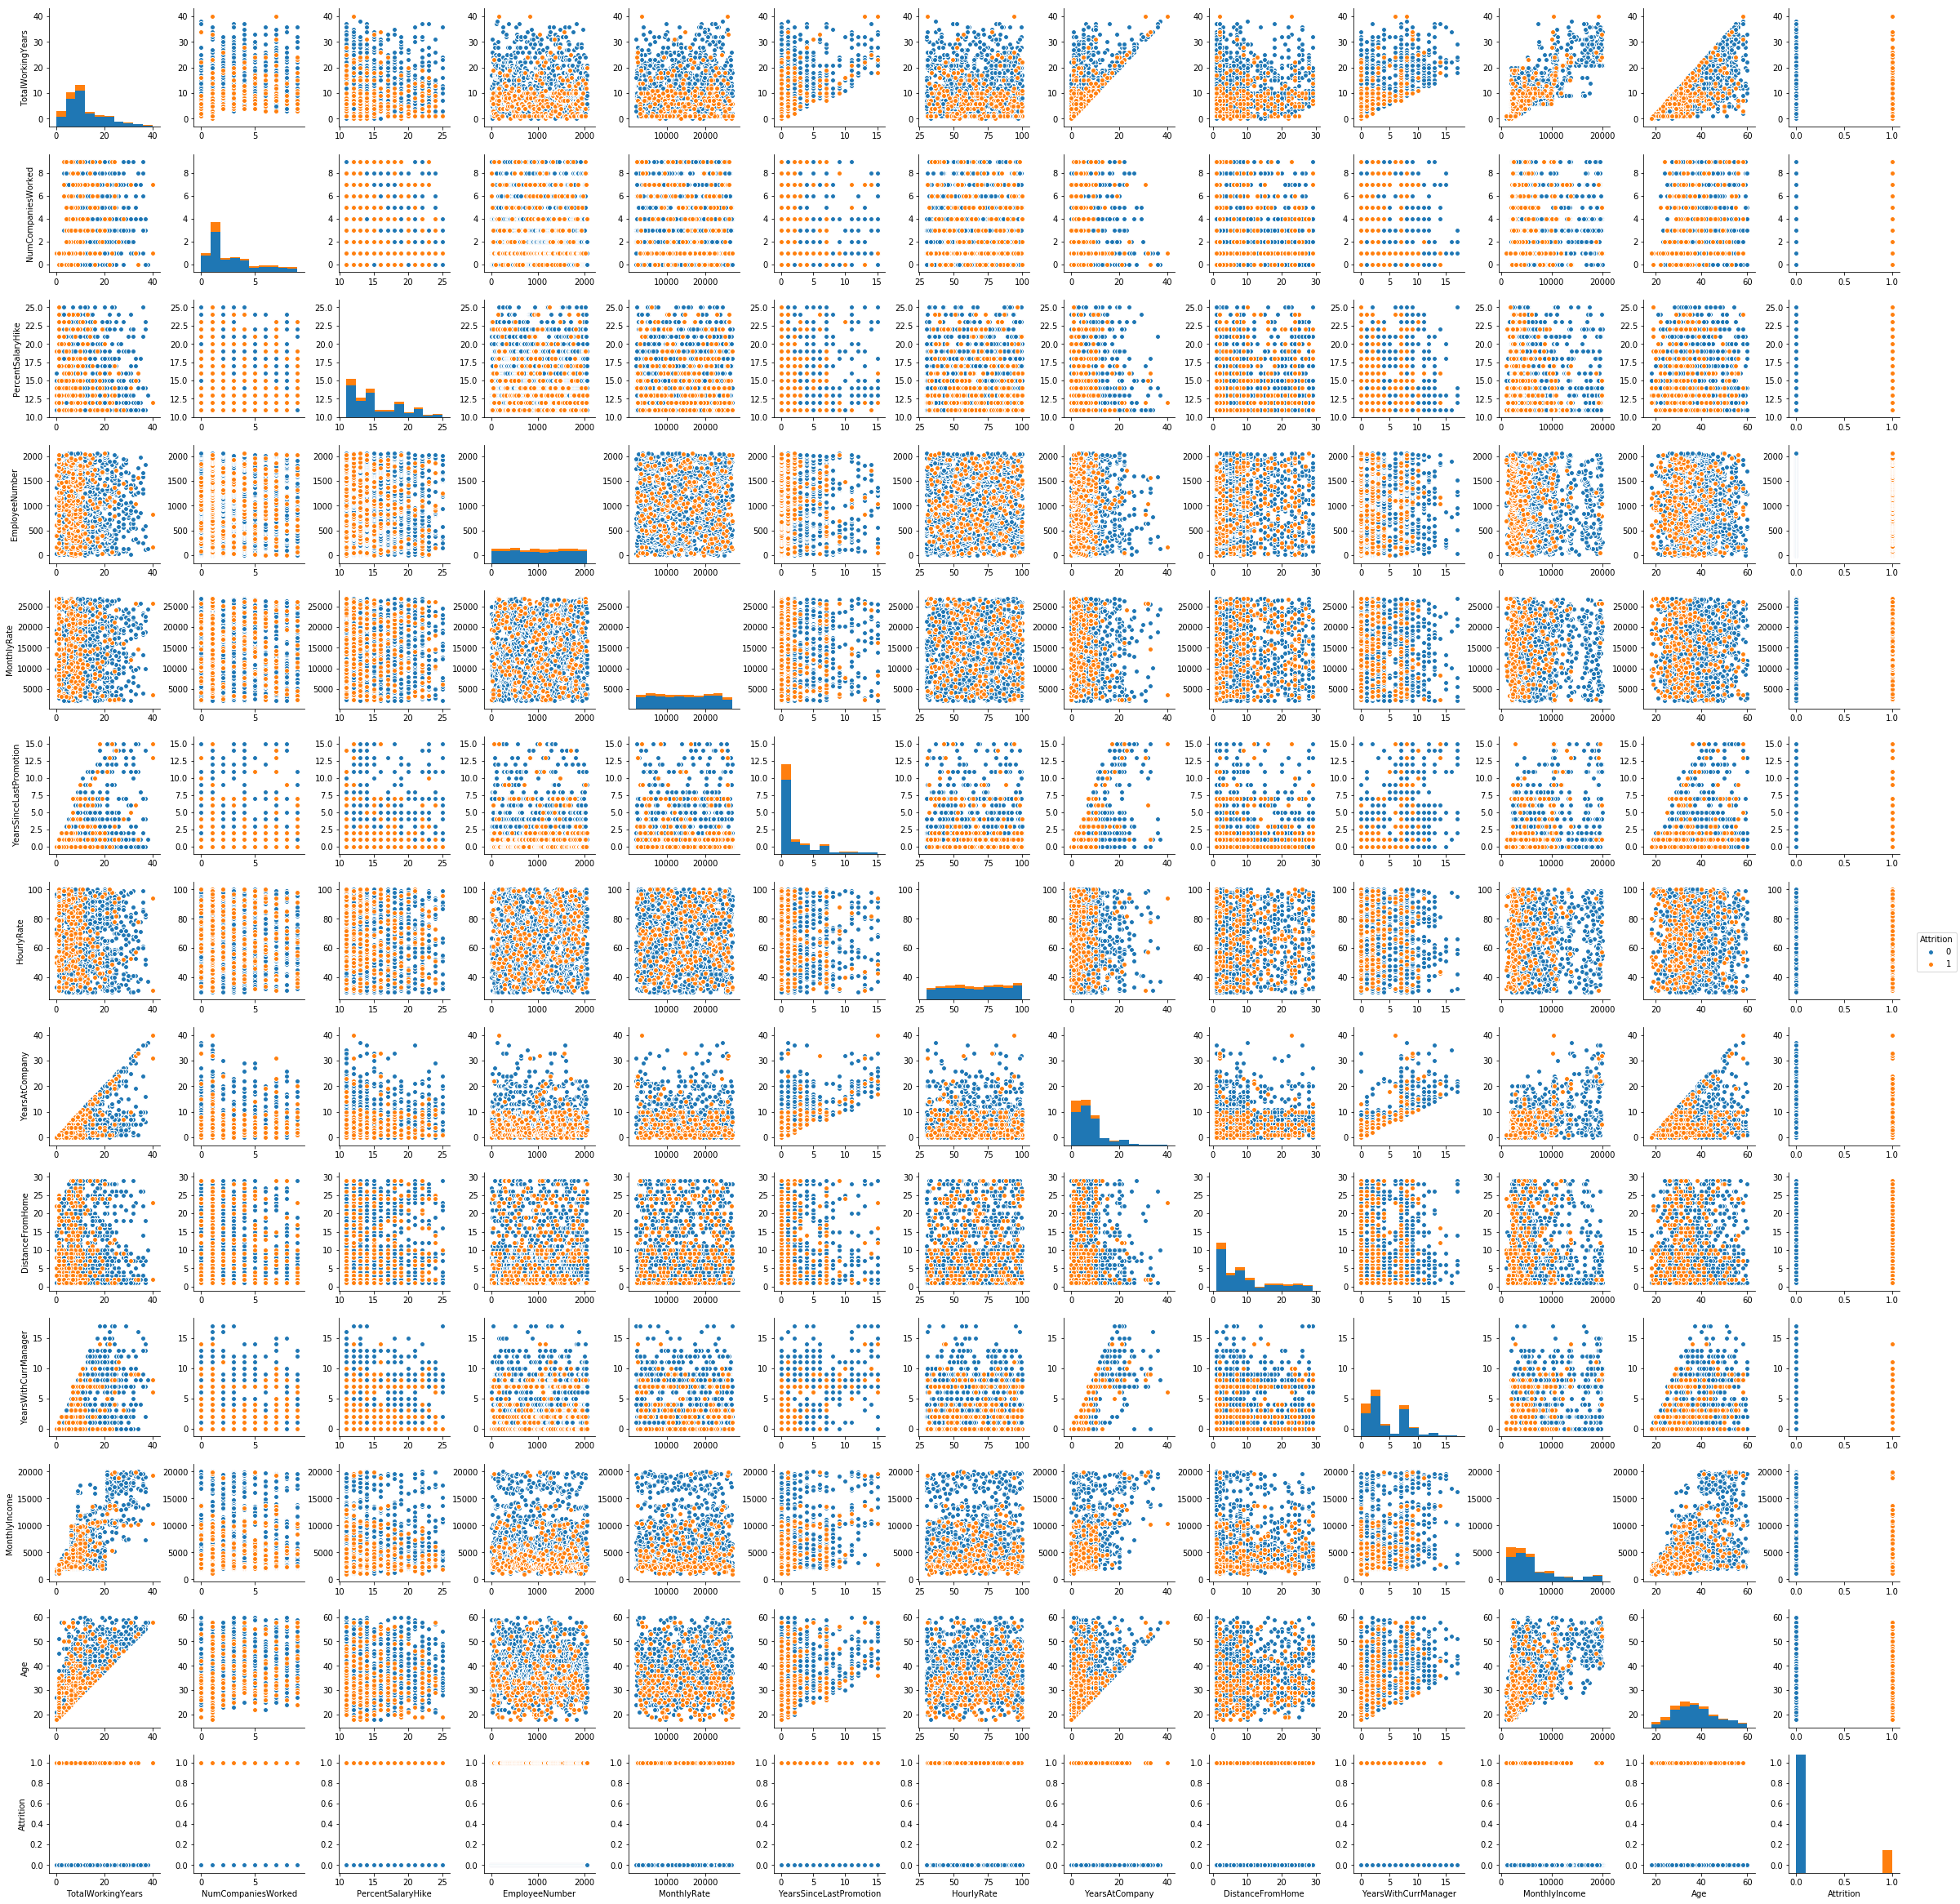

In [27]:
plt.figure(figsize=(100,100))
sn.pairplot(data[['TotalWorkingYears',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'EmployeeNumber',
 'MonthlyRate', 'YearsSinceLastPromotion',
 'HourlyRate',
 'YearsAtCompany',
 'DistanceFromHome',
 'YearsWithCurrManager',
 'MonthlyIncome',
 'Age',"Attrition"]],hue= "Attrition")

# 觀察
* 'TotalWorkingYears' : 很多離職的樣本都集中在小於20的區域
* 'YearsSinceLastPromotion' : 離職的樣本都集中在小於5的地方 , 這就有點奇怪了為何5年內被升職過的人反而容易離職?
* 'YearsAtCompany' :  離職樣本高度集中在小於10的地方 , 表示待超過10年後就不太會離職了
* 'MonthlyIncome' :  離職樣本集中在小於15000的地方


## 將幾個看起來有趣的組合拉出來看

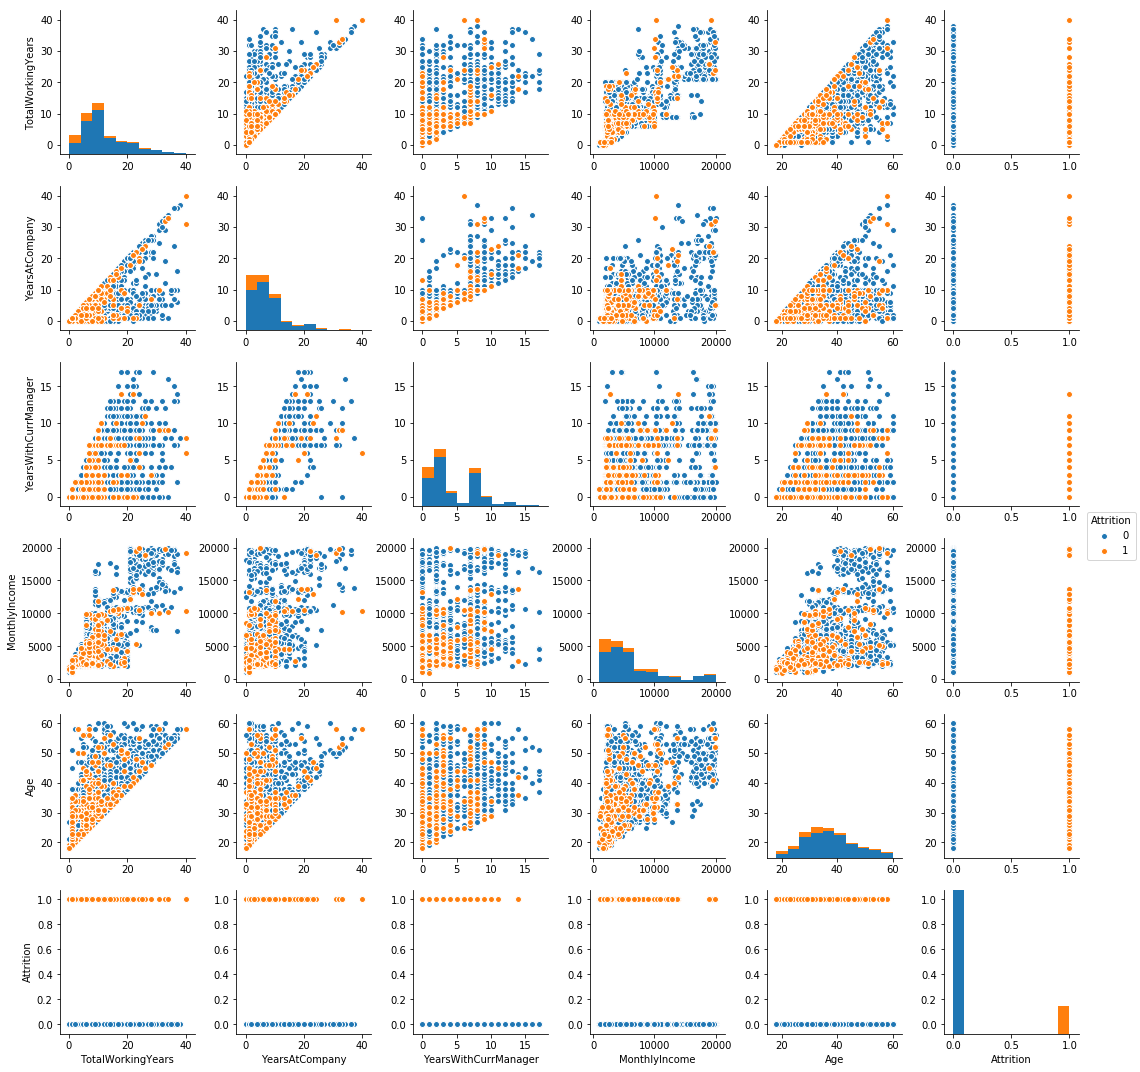

In [28]:
sn.pairplot(data[['TotalWorkingYears',
 'YearsAtCompany','YearsWithCurrManager','MonthlyIncome',"Age","Attrition"]],hue = "Attrition" )

# 觀察:
* 總工作時間以及待在公司時間都在10年一下容易離職,有趣的是當工作時間大於待在本公司時間且大於10年就不容易離職,表示這區塊員工可能是經由更換幾次工作後才來到公司,已經是選擇後的結果了不容易離職
* 工作15年內 ,月薪10000以下的族群有高離職率
* 在公司待了10年以上,且年紀大於40歲的離職率非常低
* 年紀小於35且月薪少於10000也有高離職率


# Random Forest 

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [66]:
x = data.drop("Attrition",axis=1)
y = data["Attrition"]
x_train , x_test , y_train , y_test = train_test_split(x,y)


In [67]:
rf = RandomForestClassifier()

forest = RandomForestClassifier(n_jobs = -1,
    n_estimators = 800,
    warm_start = True, 
    max_depth = 9,
    min_samples_leaf = 2,
    max_features = 'sqrt',
    random_state = 64,
    verbose = 0)

forest.fit(x_train,y_train)
pre = forest.predict(x_test)

## 定義一個為模型打分數的矩陣其中
*  accuracy 代表模型綜合準確度
*  precision 代表模型預測1,且預測正確的機率
*  recall 代表測試集中1被正確預測出來的機率
*  f1 基於precision以及recall給分的指標
## 在這個case中 我們其實真正關心的是precision以及recall

In [68]:
from sklearn.metrics import accuracy_score , f1_score
def score_matrix ( true , pred) :
    TP = np.sum(np.logical_and(pred==1,true==1))
    TN = np.sum(np.logical_and(pred==0,true==0))
    FP = np.sum(np.logical_and(pred==1,true==0))
    FN = np.sum(np.logical_and(pred==0,true==1))
    #判斷為真且為真的機率
    Precision = TP/(TP+FP)
    #為真被判斷為真的機率
    Recall = TP/(TP+FN)
    #為假被判斷為真的機率
    FPR = FP/(TN+FP)
    #平測不平衡資料的指標
    F1 = f1_score(y_true = true,y_pred=pred)
    ACC = accuracy_score (y_true=true,y_pred=pred)
    
    score = pd.DataFrame({"Index":["Precision","Recall","FPR","Accuracy","F1"],
                          "Score":[Precision,Recall,FPR,ACC, F1]})
    return score

In [69]:
score_matrix(y_test,pre)

,Index,Score
0,Precision,0.900000
1,Recall,0.140625
2,FPR,0.003289
3,Accuracy,0.847826
4,F1,0.243243


# 結果 :
 * 準確率達 0.84
 * Precision 0.9
 * 但 recall 只有0.14
## 也就是我們的model很少預測1 ,但是只要一預測1就是正確的,其實這樣的結果還不錯,因為一個公司本來就不可能預測出所有淺在會離職的員工,但是我的預測模型precision達0.9表示只要經由我的模型認定會離職的人就有高達9成會離職 , 換句話說我們可以相信模型所預測會離職的人真的有高機率會離職
## 但是還有很大的改進空間,看能不能將recall ,f1 score拉高

# Feature Engineering
## 依照資料視覺化對於各個feature的分析來嘗試做特徵工程

In [70]:
data["A"] = 0
data["B"] = 0
data["C"] = 0
data["D"] = 0
a = (data.TotalWorkingYears< 10) & (data.YearsAtCompany < 10)
b = (data.TotalWorkingYears< 15) & (data.MonthlyIncome < 12000)
c = (data.Age < 35 ) & (data.YearsAtCompany < 0)
d = (data.Age < 35 ) & (data.MonthlyIncome < 10000)
data.loc[a,"A"] = 1
data.loc[b,"B"] = 1
data.loc[c,"C"] = 1
data.loc[d,"D"] = 1


## 再次嘗試Random Forest

In [97]:
x1 = data.drop("Attrition",axis=1)
y1 = data["Attrition"]
x_train1,x_test1,y_train1,y_test1 = train_test_split(x1,y1)

forest1 = RandomForestClassifier(n_jobs = -1,
    n_estimators = 800,
    warm_start = True, 
    max_depth = 9,
    min_samples_leaf = 2,
    max_features = 'sqrt',
    random_state = 64,
    verbose = 0)

forest1.fit(x_train1,y_train1)
pre1 = forest.predict(x_test1)

In [98]:
score_matrix(pred=pre1,true=y_test1)

,Index,Score
0,Precision,1.000000
1,Recall,0.500000
2,FPR,0.000000
3,Accuracy,0.934783
4,F1,0.666667


## 結果還蠻不錯的!
## 我們的特徵工程做得不錯
* Precision : 0.9 --> 1
* Recall    : 0.14 --> 0.5
* f1 score  : 0.24 --> 0.66
* accu      : 0.84 -->0.93
### 先來視覺化一下我們的模型對feature打的分數

Text(0.5,0,'Relative Importance')

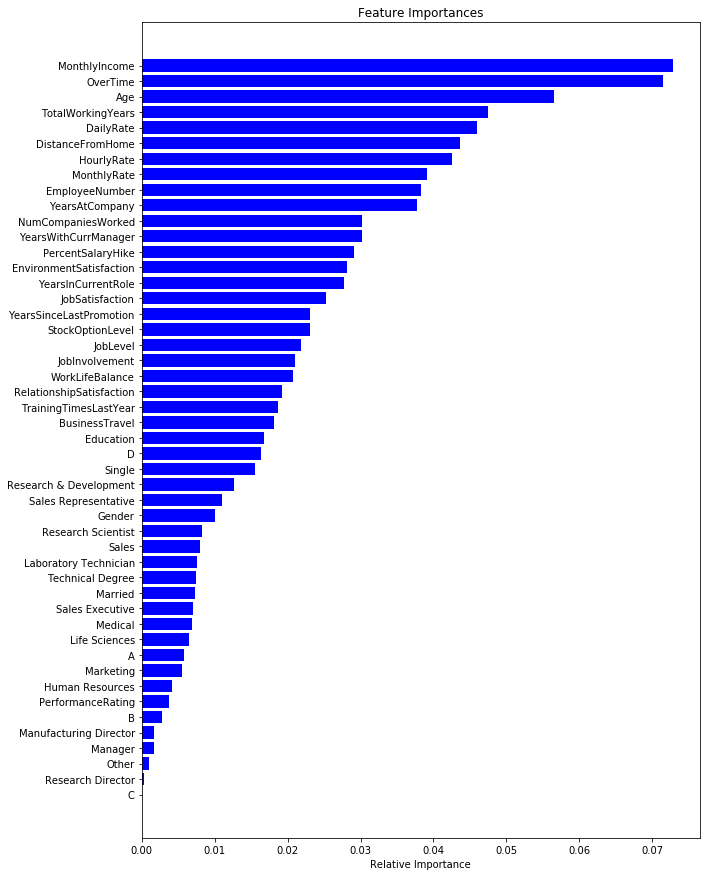

In [100]:
importances =forest1.feature_importances_
indices = np.argsort(importances)
feature_important = pd.DataFrame(forest.feature_importances_,index=x_test1.columns).sort_values(by=0,ascending = False)
plt.figure(figsize=(10,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), feature_important.index.values[: : -1])
ax = plt.gca()

plt.xlabel('Relative Importance')

# 結論 :
## 公司平常也許可以注意以下幾點 , 這幾點是根據資料視覺化所歸納出來的幾點容易使員工產生離職念頭的要點 :
* 'TotalWorkingYears' : 很多離職的樣本都集中在小於20的區域
* 'YearsSinceLastPromotion' : 離職的樣本都集中在小於5的地方 , 這就有點奇怪了為何5年內被升職過的人反而容易離職?
* 'YearsAtCompany' :  離職樣本高度集中在小於10的地方 , 表示待超過10年後就不太會離職了
* 'MonthlyIncome' :  離職樣本集中在小於15000的地方
* 總工作時間以及待在公司時間都在10年一下容易離職,有趣的是當工作時間大於待在本公司時間且大於10年就不容易離職,表示這區塊員工可能是經由更換幾次工作後才來到公司,已經是選擇後的結果了不容易離職
* 工作15年內 ,月薪10000以下的族群有高離職率
* 在公司待了10年以上,且年紀大於40歲的離職率非常低
* 年紀小於35且月薪少於10000也有高離職率

## 模型方面 :
* 一開始對資料簡單做清理,變數轉換
* 對資料做視覺化,基本的統計分析
* 一開始使用Random Forest發現結果欠佳
* 然後做特徵工程
* 得到一個不錯的結果
* 可以使用我們的模型來預測公司內哪些人可能會離職 , 進而提早做出應對
* 我們的模型可以找出潛在會離職的員工50%

## 心得 :
## 在經過許多許多嘗試後,終於找到一個方法能把這不平衡資料訓練起來,花了很多時間但也學到很多
## 繼續朝Data scientist的目標努力!

